In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data=pd.read_csv('Summer-Olympic-medals-1976-to-2008.csv',encoding='Windows-1252')
data

,City,Year,Sport,Discipline,Event,Athlete,Gender,Country_Code,Country,Event_gender,Medal
0,Montreal,1976.0,Aquatics,Diving,3m springboard,"KÖHLER, Christa",Women,GDR,East Germany,W,Silver
1,Montreal,1976.0,Aquatics,Diving,3m springboard,"KOSENKOV, Aleksandr",Men,URS,Soviet Union,M,Bronze
2,Montreal,1976.0,Aquatics,Diving,3m springboard,"BOGGS, Philip George",Men,USA,United States,M,Gold
3,Montreal,1976.0,Aquatics,Diving,3m springboard,"CAGNOTTO, Giorgio Franco",Men,ITA,Italy,M,Silver
4,Montreal,1976.0,Aquatics,Diving,10m platform,"WILSON, Deborah Keplar",Women,USA,United States,W,Bronze
...,...,...,...,...,...,...,...,...,...,...,...
15428,Beijing,2008.0,Wrestling,Wrestling Gre-R,66 - 74kg,"GUENOT, Christophe",Men,FRA,France,M,Bronze
15429,Beijing,2008.0,Wrestling,Wrestling Gre-R,66 - 74kg,"KVIRKELIA, Manuchar",Men,GEO,Georgia,M,Gold
15430,Beijing,2008.0,Wrestling,Wrestling Gre-R,55 - 60kg,"RAHIMOV, Vitaliy",Men,AZE,Azerbaijan,M,Silver
15431,Beijing,2008.0,Wrestling,Wrestling Gre-R,60 - 66kg,"GUENOT, Steeve",Men,FRA,France,M,Gold


In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15315 entries, 0 to 15432
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   City          15315 non-null  object 
 1   Year          15315 non-null  float64
 2   Sport         15315 non-null  object 
 3   Discipline    15315 non-null  object 
 4   Event         15315 non-null  object 
 5   Athlete       15315 non-null  object 
 6   Gender        15315 non-null  object 
 7   Country_Code  15315 non-null  object 
 8   Country       15315 non-null  object 
 9   Event_gender  15315 non-null  object 
 10  Medal         15315 non-null  object 
dtypes: float64(1), object(10)
memory usage: 1.4+ MB


In [5]:
data.isnull().sum()

City            117
Year            117
Sport           117
Discipline      117
Event           117
Athlete         117
Gender          117
Country_Code    117
Country         117
Event_gender    117
Medal           117
dtype: int64

In [6]:
data.dropna(inplace=True)

In [10]:
data.drop_duplicates(inplace=True)

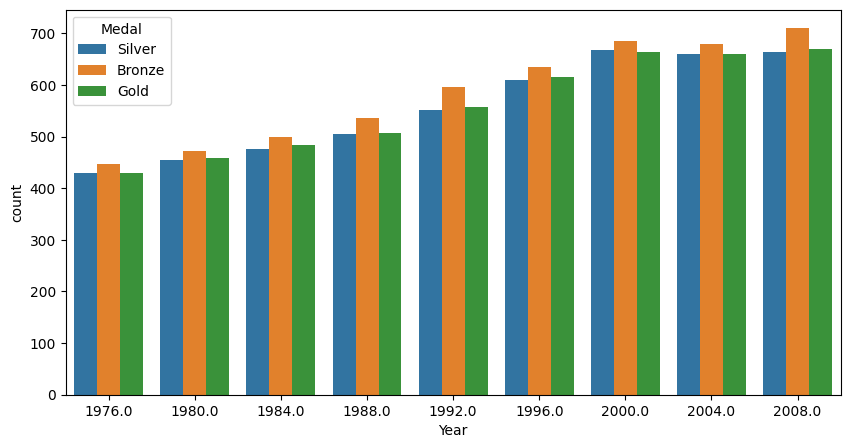

In [20]:
#Medals awarded in Each olympics

plt.figure(figsize=(10, 5))
sns.countplot(data=data, x='Year', hue='Medal')
plt.show()

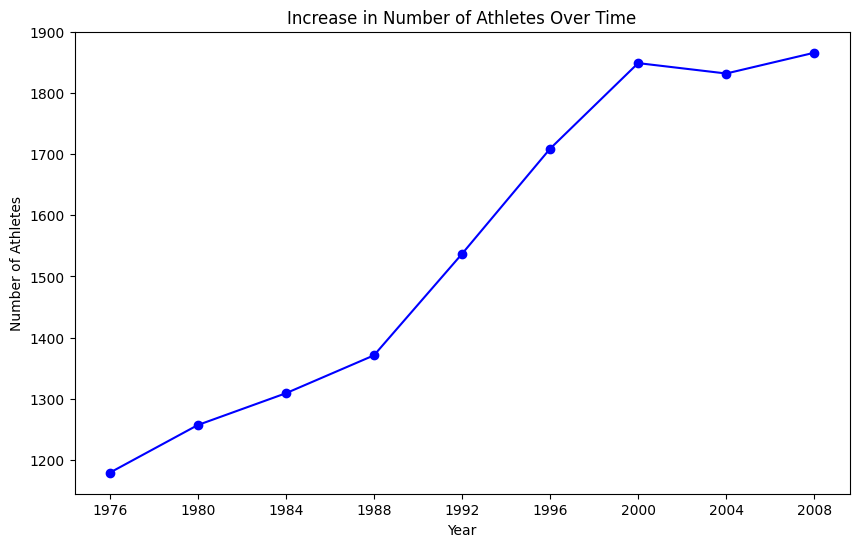

In [25]:
##What has been the increase in number of athletes over time?

athletes_per_year = data.groupby('Year')['Athlete'].nunique()
plt.figure(figsize=(10, 6))
plt.plot(athletes_per_year.index, athletes_per_year.values, marker='o', color='b')
plt.title('Increase in Number of Athletes Over Time')
plt.xticks(athletes_per_year.index)
plt.xlabel('Year')
plt.ylabel('Number of Athletes')
plt.show()

In [27]:
#Fom the plot we can clearly see that the number of athletes increased gradually from 1976 to 1988.
#Then it increased rapidly untill 2000 and remained almost in the same level(over 1800 athletes) till 2008.

<Figure size 1200x800 with 0 Axes>

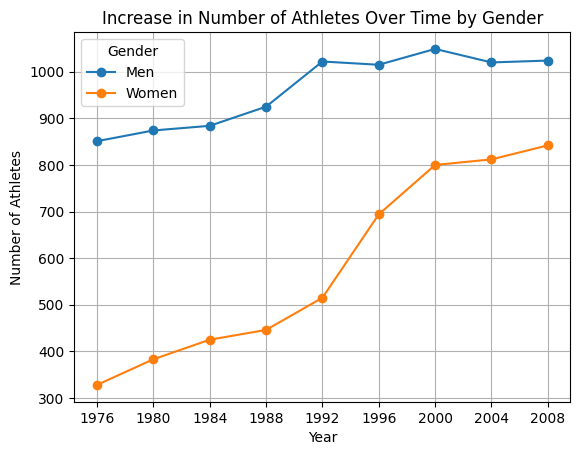

In [29]:

#What has been the increase in participating atheletes over time by gender?

athletes_per_year_gender = data.groupby(['Year', 'Gender'])['Athlete'].nunique().unstack()
plt.figure(figsize=(12, 8))
athletes_per_year_gender.plot(kind='line', marker='o')
plt.title('Increase in Number of Athletes Over Time by Gender')
plt.xticks(athletes_per_year_gender.index)
plt.xlabel('Year')
plt.ylabel('Number of Athletes')
plt.grid(True)
plt.legend(title="Gender")
plt.show()

In [ ]:
#from thi plot we can clraly see that number of female athletes incresed rapidly over the years


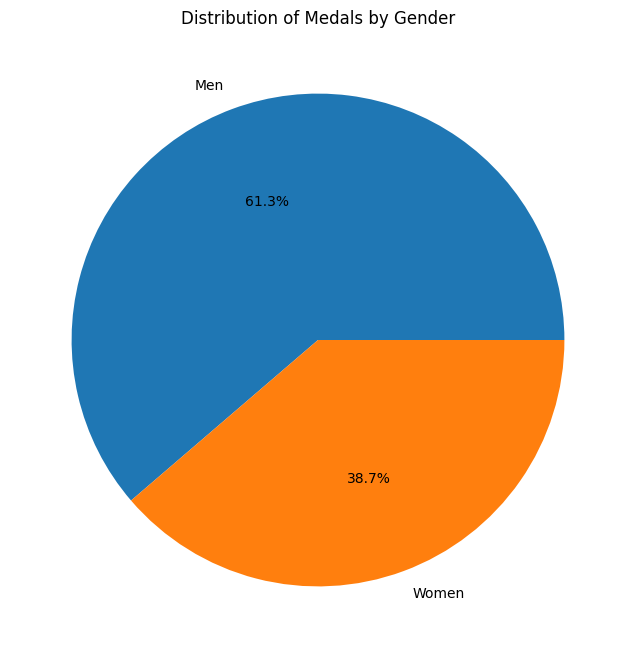

In [34]:
medals_by_gender = data.groupby('Gender')['Medal'].count()
plt.figure(figsize=(8, 8))
plt.pie(medals_by_gender, labels=medals_by_gender.index, autopct='%1.1f%%')
plt.title('Distribution of Medals by Gender')
plt.show()

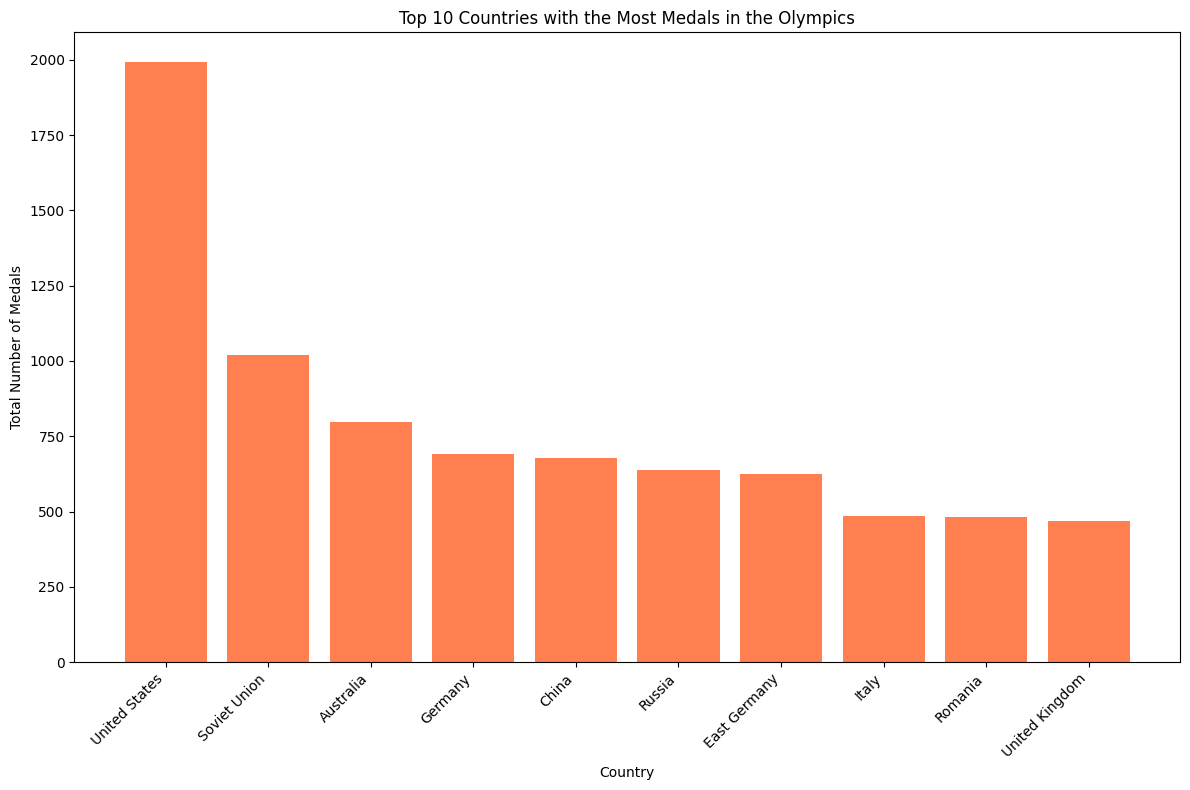

In [55]:
#What countries have been awarded the most number of medals?

medal_counts = data.groupby('Country')['Medal'].count().reset_index()

top_10_countries = medal_counts.sort_values(by='Medal', ascending=False).head(10)

plt.figure(figsize=(12, 8))
plt.bar(top_10_countries['Country'], top_10_countries['Medal'], color='coral')
plt.xlabel('Country')
plt.ylabel('Total Number of Medals')
plt.title('Top 10 Countries with the Most Medals in the Olympics')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

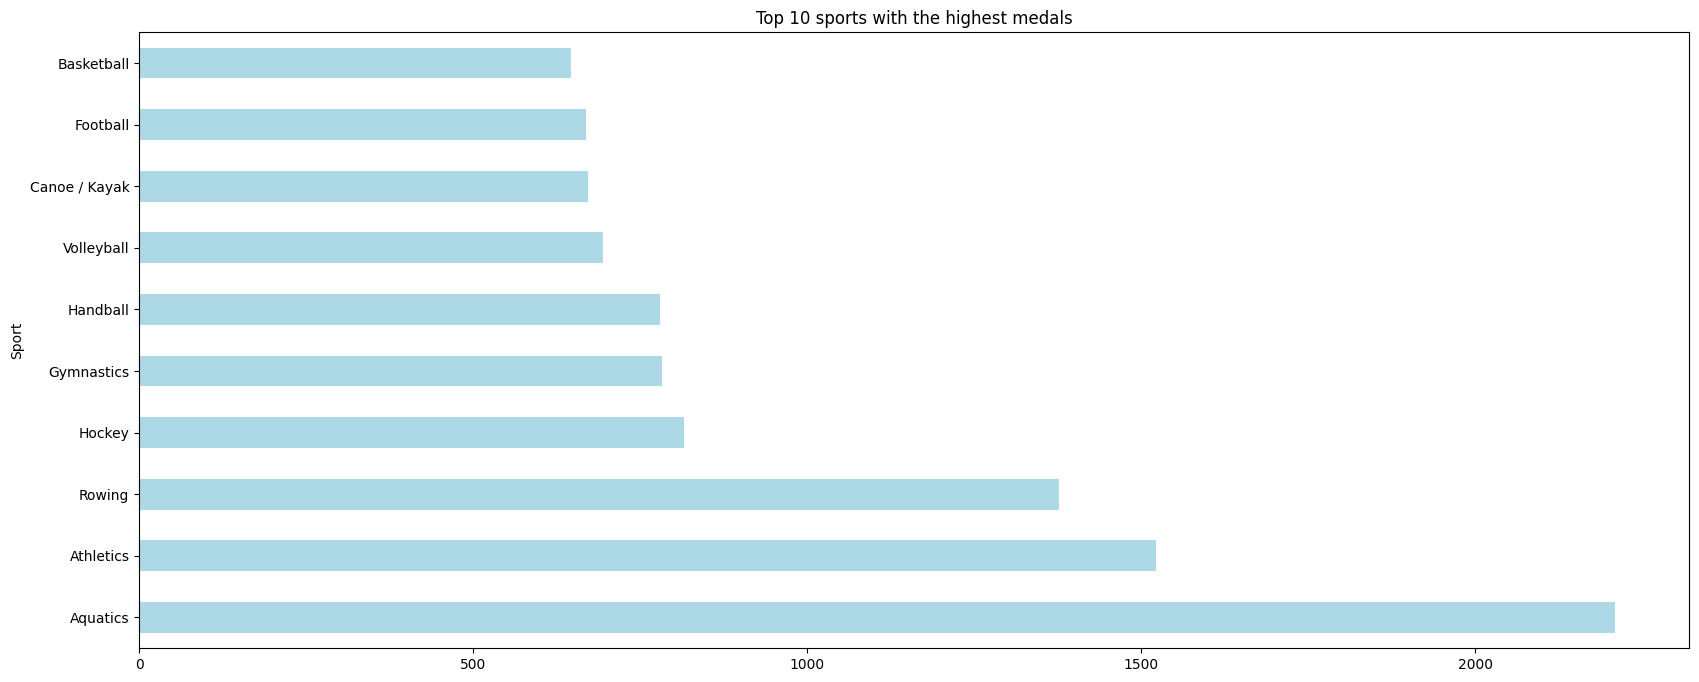

In [59]:
# for top 10 sports with most number of medals awarded?

new_df = data['Sport'].value_counts().sort_values(ascending=False)
top_sports = new_df[:10]
top_sports.plot(kind='barh',figsize=(20,8),color='lightblue')
plt.title('Top 10 sports with the highest medals')
plt.show()

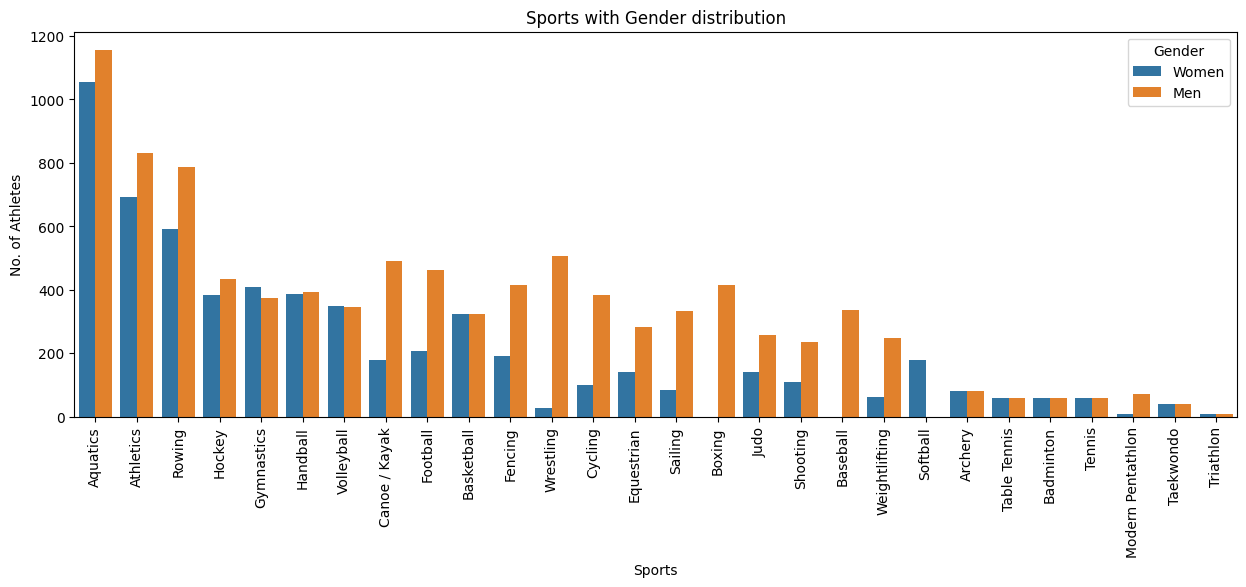

In [60]:
# sports with gender distribution

plt.figure(figsize=(15, 5))
highest_sport = data['Sport'].value_counts().index
sns.countplot(data=data, x='Sport', hue = 'Gender', order=highest_sport)
plt.xticks(rotation=90)
plt.title('Sports with Gender distribution')
plt.xlabel('Sports')
plt.ylabel('No. of Athletes')
plt.show()

In [61]:
# medal won by Indians over the years

indian_data= data[data['Country']=='India']
indian_data

,City,Year,Sport,Discipline,Event,Athlete,Gender,Country_Code,Country,Event_gender,Medal
2288,Moscow,1980.0,Hockey,Hockey,hockey,"SINGH, Singh",Men,IND,India,M,Gold
2289,Moscow,1980.0,Hockey,Hockey,hockey,"FERNANDES, Mervyn",Men,IND,India,M,Gold
2294,Moscow,1980.0,Hockey,Hockey,hockey,"GURMAIL, Singh",Men,IND,India,M,Gold
2302,Moscow,1980.0,Hockey,Hockey,hockey,"BASKARAN, Baskaran",Men,IND,India,M,Gold
2303,Moscow,1980.0,Hockey,Hockey,hockey,"ZAFAR, Zafar",Men,IND,India,M,Gold
2313,Moscow,1980.0,Hockey,Hockey,hockey,"MOHAMMAD, Shahid",Men,IND,India,M,Gold
2339,Moscow,1980.0,Hockey,Hockey,hockey,"KAUSHIK, Maharaj Krishon",Men,IND,India,M,Gold
2341,Moscow,1980.0,Hockey,Hockey,hockey,"SURINDER, Singh",Men,IND,India,M,Gold
2347,Moscow,1980.0,Hockey,Hockey,hockey,"KUMAR, Charanjit",Men,IND,India,M,Gold
2348,Moscow,1980.0,Hockey,Hockey,hockey,"SYLVANUS, Dung Dung",Men,IND,India,M,Gold


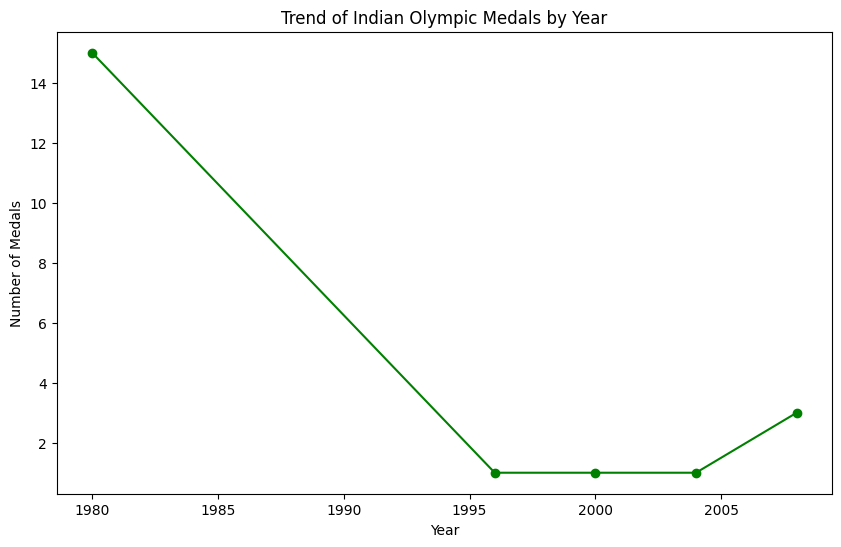

In [72]:
medals_per_year = indian_data['Year'].value_counts().sort_index()
plt.figure(figsize=(10, 6))
medals_per_year.plot(kind='line', marker='o', linestyle='-', color='green')
plt.xlabel('Year')
plt.ylabel('Number of Medals')
plt.title('Trend of Indian Olympic Medals by Year')
plt.show()

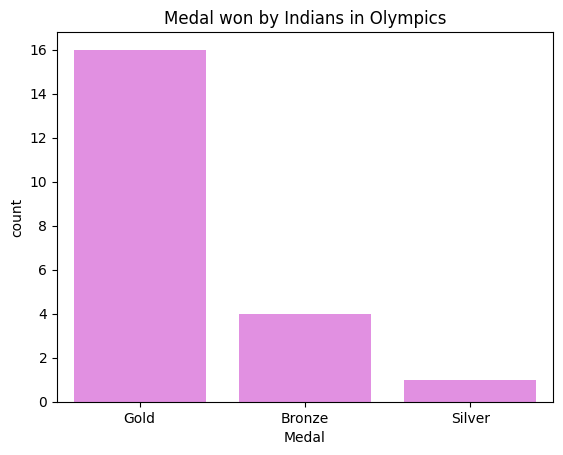

In [77]:
sns.countplot(data=indian_data,x='Medal',color='violet')
plt.title('Medal won by Indians in Olympics')
plt.show()

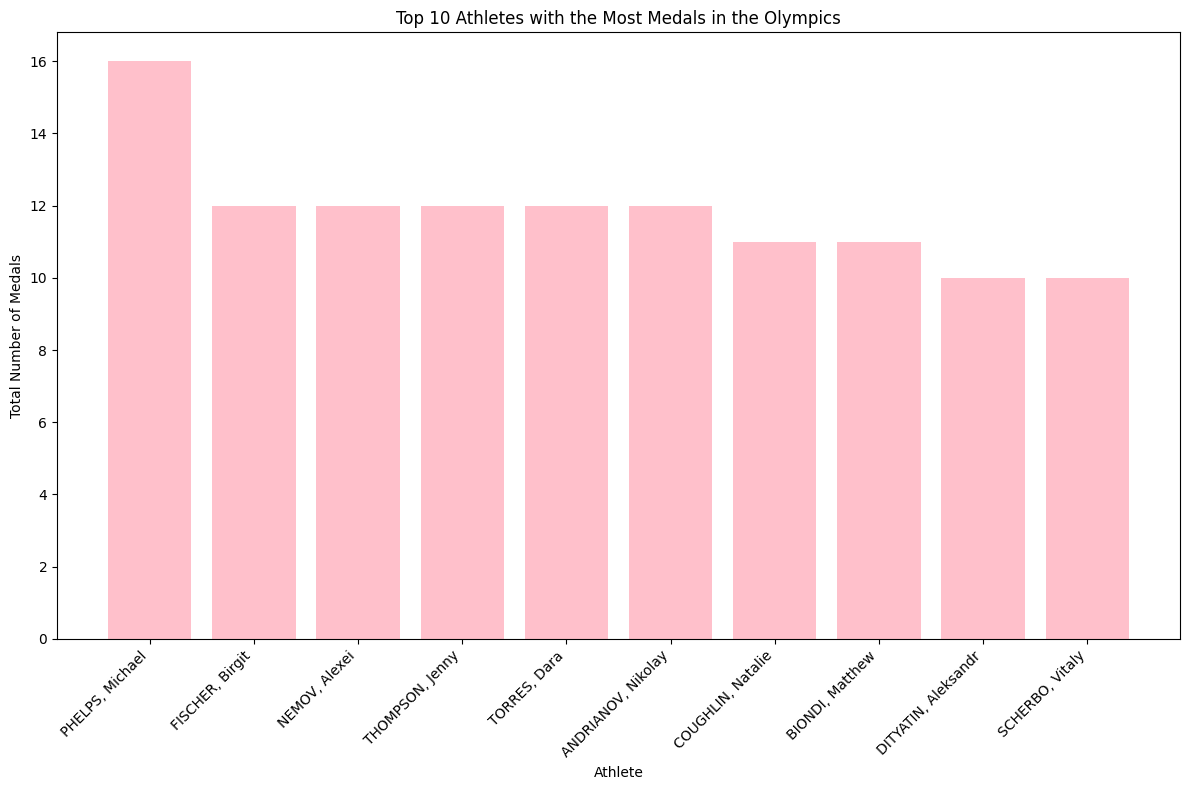

In [81]:
# Top 10 athlets with maximum medal count


medal_count = data.groupby('Athlete')['Medal'].count()
Top_10_Athlete = medal_count.sort_values(ascending=False).head(10)

plt.figure(figsize=(12, 8))
plt.bar(Top_10_Athlete.index, Top_10_Athlete.values, color='pink')
plt.xlabel('Athlete')
plt.ylabel('Total Number of Medals')
plt.title('Top 10 Athletes with the Most Medals in the Olympics')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()
